# Carrot Company -eCommerce Product Recommendation 
# Part 3 Feature Engineering & ML Modeling

#  Load Feature Data

In [23]:
import warnings
warnings.filterwarnings("ignore")

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [25]:
from imblearn.pipeline import Pipeline 
from imblearn.under_sampling import RandomUnderSampler 
from imblearn.over_sampling import RandomOverSampler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV

from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score


In [31]:
#!pip3 install xgboost 
import xgboost as xgb

In [32]:
model_all_data = pd.read_csv(r'/Users/jichenxi/Documents/MGT_Group_Project/model_all_data.csv')

In [33]:
model_all_data.head()

,user_id,product_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,unique_key,label,user_product__total_orders,user_product__add_to_cart_order_mean,...,product__most_hod,product__days_since_prior_order_mean,product__aisle_id,product__department_id,user__order_count,user__product_count,user__days_since_prior_order_mean,user__reordered_mean,user__most_dow,user__most_hod
0,152610,30597,22,6,8,10.0,152610_30597,0,5,2.00,...,9,12.592593,53,16,26,408,10.953804,0.375,6,12
1,152610,15221,22,6,8,10.0,152610_15221,0,8,8.25,...,12,13.653846,84,16,26,408,10.953804,0.375,6,12
2,152610,43772,22,6,8,10.0,152610_43772,0,2,3.00,...,12,12.008565,83,4,26,408,10.953804,0.375,6,12
3,152610,37886,22,6,8,10.0,152610_37886,0,2,3.50,...,14,11.489362,53,16,26,408,10.953804,0.375,6,12
4,152610,37215,22,6,8,10.0,152610_37215,0,1,5.00,...,13,11.490066,98,7,26,408,10.953804,0.375,6,12


In [34]:
unique_key = ['user_id', 'product_id']
raw_features = ['order_number',
                     'order_dow',
                     'order_hour_of_day',
                     'days_since_prior_order',
                     'user_product__total_orders',
                     'user_product__add_to_cart_order_mean',
                     'user_product__reordered_mean',
                     'user_product__most_dow',
                     'user_product__most_hod',
                     'product__total_orders',
                     'product__add_to_cart_order_mean',
                     'product__total_users',
                     'product__reordered_mean',
                     'product__most_dow',
                     'product__most_hod',
                     'product__days_since_prior_order_mean',
                     'user__order_count',
                     'user__product_count',
                     'user__days_since_prior_order_mean',
                     'user__reordered_mean',
                     'user__most_dow',
                     'user__most_hod',
                     'product__aisle_id',
                     'product__department_id',
                     ]
label = ['label']

In [35]:
model_all_data = model_all_data[unique_key + raw_features + label]

In [36]:
model_all_data.shape

(329806, 27)

# Feature Data Analysis & Tranformation

### Label Ratio

In [37]:
label_count = model_all_data.label.value_counts()
print("Negative label count: ", label_count[0])
print("Positive label count: ", label_count[1])
print("Positive label rate is {:.2f}%".format(
      label_count[1] / (label_count[0] + label_count[1]) * 100) )

Negative label count:  297467
Positive label count:  32339
Positive label rate is 9.81%


In [38]:
model_all_data.columns

Index(['user_id', 'product_id', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order',
       'user_product__total_orders', 'user_product__add_to_cart_order_mean',
       'user_product__reordered_mean', 'user_product__most_dow',
       'user_product__most_hod', 'product__total_orders',
       'product__add_to_cart_order_mean', 'product__total_users',
       'product__reordered_mean', 'product__most_dow', 'product__most_hod',
       'product__days_since_prior_order_mean', 'user__order_count',
       'user__product_count', 'user__days_since_prior_order_mean',
       'user__reordered_mean', 'user__most_dow', 'user__most_hod',
       'product__aisle_id', 'product__department_id', 'label'],
      dtype='object')

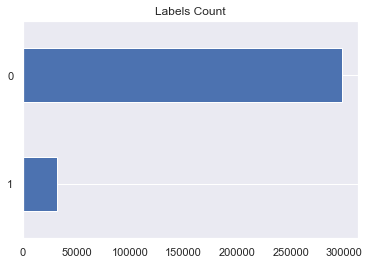

In [39]:
ax = label_count.sort_values().plot(kind='barh', title='Labels Count')
ax.grid(axis="x")

### Null value check

In [40]:
model_all_data.isna().sum()

user_id                                     0
product_id                                  0
order_number                                0
order_dow                                   0
order_hour_of_day                           0
days_since_prior_order                  29995
user_product__total_orders                  0
user_product__add_to_cart_order_mean        0
user_product__reordered_mean                0
user_product__most_dow                      0
user_product__most_hod                      0
product__total_orders                       0
product__add_to_cart_order_mean             0
product__total_users                        0
product__reordered_mean                     0
product__most_dow                           0
product__most_hod                           0
product__days_since_prior_order_mean      726
user__order_count                           0
user__product_count                         0
user__days_since_prior_order_mean           0
user__reordered_mean              

### Categorical Feature Transformation

In [41]:
# One-hot encoding for the `product__department_id` feature.
model_all_data = pd.concat(
    [model_all_data.drop('product__department_id',axis=1),
     pd.get_dummies(model_all_data["product__department_id"],
                    prefix='product__department_id_')],
                     axis=1)

In [42]:
model_all_data.head()

,user_id,product_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,user_product__total_orders,user_product__add_to_cart_order_mean,user_product__reordered_mean,user_product__most_dow,...,product__department_id__12,product__department_id__13,product__department_id__14,product__department_id__15,product__department_id__16,product__department_id__17,product__department_id__18,product__department_id__19,product__department_id__20,product__department_id__21
0,152610,30597,22,6,8,10.0,5,2.00,0.800,6,...,0,0,0,0,1,0,0,0,0,0
1,152610,15221,22,6,8,10.0,8,8.25,0.875,4,...,0,0,0,0,1,0,0,0,0,0
2,152610,43772,22,6,8,10.0,2,3.00,0.500,5,...,0,0,0,0,0,0,0,0,0,0
3,152610,37886,22,6,8,10.0,2,3.50,0.500,6,...,0,0,0,0,1,0,0,0,0,0
4,152610,37215,22,6,8,10.0,1,5.00,0.000,6,...,0,0,0,0,0,0,0,0,0,0


#  Split Dataset to Train, Validation and Test

In order to do model training, model selection and evaluation, we split `model_all_data` to three parts: train, validation, test.

In [43]:
model_all_data.shape

(329806, 47)

In [44]:
test_user_ids = model_all_data.user_id.drop_duplicates().sample(frac=0.2)
train_validation_data = model_all_data[~model_all_data.user_id.isin(test_user_ids)]
test_data = model_all_data[model_all_data.user_id.isin(test_user_ids)]

In [45]:
train_validation_data.shape

(263356, 47)

In [46]:
test_data.shape

(66450, 47)

# Model Selection with Cross Validation

## Model Selection with All Features

We have a list of candidate models to test and choose and compare the performance:  
* Logistic Regression
* Decision Tree Classifier 
* Random Forest Classifier 
* AdaBoost Classifier
* GrandientBoostingClassifier
* XGBoost Classifier

In [47]:
# prepare train, val data
train_validation_data_x = train_validation_data.drop(['user_id', 'product_id', 'label'],axis=1)
train_validation_data_y = train_validation_data['label']

In [48]:
# Get the list of models we want to test
classifiers = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    xgb.XGBClassifier()
    ]

**Build a ml pipeline to perform data inputation, random down-sampling and scaling** 

Since this pipeline is reusable and applicable across all models we selected, we can just append all the models into the function and run a for loop to perform cross validation in the next steps. 

The `Pipeline` function sequentially apply a list of transforms and a final estimator. Intermediate steps of the pipeline must be `transforms`, that is, they must implement `fit` and `transform` methods. The final estimator only needs to implement `fit`. The transformers in the pipeline can be cached using memory argument.[Reference](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html)
* Simple Imputer: There are not many missing data in the original dataset, so simple imputation method to fill NAN would be sufficient [Reference](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html)
* Downsampling: sampling mathod used for imbalanced dataset. Imbalanced datasets are those with a severe skew in the class distribution, such as 1:100 or 1:1000, the bias in the training dataset can influence many machine learning algorithms and lead to ignorance to minority class, which sometimes are the most important predictions.
    - the approach here to address the problem of class imnbalance is to randomly resample the training dataset. There are two ways to achieve this goal: to delete examples from the majority class (undersampling) and add duplicate examples from minority class (oversampling). We chose to use undersmapling here. [Reference](https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.RandomUnderSampler.html)
* Scaling - We use MinMaxScaling to transform features by giving each of them a range. [Reference](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)

In [49]:
# define a ml pipeline
def build_ml_pipeline(classifier):
  steps = list()
  steps.append(('fillnan', SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0.0)))
  steps.append(('downSample', RandomUnderSampler()))
  steps.append(('scaler', MinMaxScaler()))
  steps.append(('model', classifier))
  pipeline = Pipeline(steps=steps)
  return pipeline

**Cross Validation using f1 scoring system.**

F1 score sums up the predictive performance of a model by combining two otherwise competing metrics: precision and recall. So it has some advantages over traditional scorings like r2, roc-auc.

$Precision: \frac{TP}{TP+FP}$ Measures the extent of error caused by FP. <br> 
$Recall: \frac{TP}{TP+FN} $ Measures the extent of error caused by FN.<br>
$F1-score =2*\frac{Precision*Recall}{Precision+Recall}$

Beacause of the trade-off between precision and recall, *increasing precision will decrease recall, and vice versa.* 

By definition, F1 score is the harmonic mean of precision and recall, which “penalises unequal values more” when precision and recall are unequal. The higher the precision and recall, the higher the F1-score. F1-score ranges between 0 and 1. *The closer it is to 1, the better the model.*


[Reference](https://towardsdatascience.com/essential-things-you-need-to-know-about-f1-score-dbd973bf1a3#:~:text=1.-,Introduction,competing%20metrics%20%E2%80%94%20precision%20and%20recall)


**Using cross_val_score function to perform cross validation to a list of pipelined models.**
* using training_validartion dataset
* cv = 10-fold 

In [50]:
#select the best model using cross validation 
#evaluate the model using f1 score 
for classifier in classifiers:
  pipeline = build_ml_pipeline(classifier)
  %time scores = cross_val_score(pipeline, train_validation_data_x, train_validation_data_y, cv=10, scoring='f1')
   #Valid options are ['accuracy','adjusted_rand_score', 'average_precision', 'f1', 'log_loss', 'mean_absolute_error', 'mean_squared_error', 'precision', 'r2', 'recall', 'roc_auc']

  print(classifier.__class__.__name__, ': F1 value is %.3f (%.3f)' % (np.mean(scores)*100, np.std(scores)*100))
  print('==============')

CPU times: user 24.3 s, sys: 5.22 s, total: 29.5 s
Wall time: 4.28 s
LogisticRegression : F1 value is 34.731 (2.267)
CPU times: user 8.33 s, sys: 317 ms, total: 8.65 s
Wall time: 7.64 s
DecisionTreeClassifier : F1 value is 24.067 (1.114)
CPU times: user 1min 15s, sys: 254 ms, total: 1min 15s
Wall time: 1min 15s
RandomForestClassifier : F1 value is 32.948 (2.540)
CPU times: user 24.9 s, sys: 42.6 ms, total: 24.9 s
Wall time: 25 s
AdaBoostClassifier : F1 value is 33.916 (2.602)
CPU times: user 1min 54s, sys: 229 ms, total: 1min 54s
Wall time: 1min 54s
GradientBoostingClassifier : F1 value is 34.852 (2.955)
CPU times: user 3min 36s, sys: 14.3 s, total: 3min 50s
Wall time: 32.2 s
XGBClassifier : F1 value is 30.028 (3.004)


## Feature Importance Ranking and Selection

Generally, importance provides a score that indicates how *useful* or *valuable* each feature was in the construction of the boosted decision trees within the model. The more an attribute is used to make key decisions with decision trees, the higher its relative importance. Feature importance scores will be in the range [0,1]. Higher scores mean the feature is more important.

Importance is calculated for a single decision tree by the amount that each attribute split point improves the performance measure, weighted by the number of observations the node is responsible for. The performance measure may be the purity (Gini index) used to select the split points or another more specific error function.

The feature importances are then averaged across all of the the decision trees within the model.

Reference: *The Elements of Statistical Learning, 10.13.1 Relative Importance of Rredictor Variables*

In [30]:
#this block takes a few mins to run
pipeline = build_ml_pipeline(GradientBoostingClassifier())
pipeline.fit(train_validation_data_x, train_validation_data_y)

Pipeline(steps=[('fillnan', SimpleImputer(fill_value=0.0, strategy='constant')),
                ('downSample', RandomUnderSampler()),
                ('scaler', MinMaxScaler()),
                ('model', GradientBoostingClassifier())])

In [31]:
#get the list of feature importance
importances = pipeline.steps[3][1].feature_importances_
feature_names=train_validation_data_x.columns.tolist()

In [36]:
df_importances = pd.DataFrame(
    {"feature":feature_names, "importance":importances}).sort_values("importance", ascending=False)
top15_features = df_importances.head(15)    

In [37]:
# Only use the selected top 15 features in our training data.
train_validation_data_x_select_features = train_validation_data_x[top15_features['feature']]

In [38]:
# Top 15 most important features before tuning the hyperparameter of the model
top15_features

,feature,importance
4,user_product__total_orders,0.295538
16,user__order_count,0.293911
6,user_product__reordered_mean,0.210513
0,order_number,0.082272
12,product__reordered_mean,0.069420
19,user__reordered_mean,0.014992
9,product__total_orders,0.007233
3,days_since_prior_order,0.006646
18,user__days_since_prior_order_mean,0.003915
10,product__add_to_cart_order_mean,0.002965


# Try Logistic Regression and Gradient Boosting

## Hyper-parameter tuning for Logistic Regression

**Model parameters**<br>
- *Hyperparameter C*: In logistic regression, a high value of C tells the model to give more weight to the training data. A lower value of C will indicate the model to give complexity more weight at the cost of fitting the data. Here tried a list of different levels of C values from 0.01 to 10000.

- *Variables optimization*: Tried L1, L2, ElasticNet and None to find the best variable optimization strategy.

- *Solver*: Tried different types of solvers such as newton-cg, lbfgs, liblinear, sag, saga. 

**Use GridSearch to find the best parameter.** <br>
GridSearch is a method within sklearn.model_selection class to perform exhausive search over specified parameter values for an estimator.The parameters of the estimator used to apply these methods are optimized by cross-validated grid-search over a parameter grid. [Reference](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV)

In [87]:
# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid_l = { "model__penalty":['l1','l2','elasticnet','none'],
              "model__C":  [0.01,0.1,1,10,100,500,1000,10000],  # get a parameter of how much weight we want to put on training data
              'model__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], # try different solvers
             }

search = GridSearchCV(build_ml_pipeline(LogisticRegression()), cv = 10, 
                      param_grid=param_grid_l, n_jobs=2, scoring = 'f1')
search.fit(train_validation_data_x_select_features, train_validation_data_y)

print("Best parameter f1 score is %.3f" %  search.best_score_)
print(search.best_params_)

Best parameter f1 score is 0.350
{'model__C': 100, 'model__penalty': 'l2', 'model__solver': 'liblinear'}


**Hyperparameter Tuning Result for Logistic Regression**

* Best parameter f1 score is 0.350
* 'model__C': 100
* 'model__penalty': 'l2' (ridge)
* 'model__solver': 'liblinear'

In [95]:
print("Best parameter f1 score is %.3f" %  search.best_score_)
print(search.best_params_)

Best parameter f1 score is 0.350
{'model__C': 100, 'model__penalty': 'l2', 'model__solver': 'liblinear'}


## Hyper-parameter tuning for GradientBoostingClassifier

In [90]:
param_grid_g = {
    'model__n_estimators': [100,150],
    'model__max_depth': [4,6],
    'model__min_samples_split': [2,4,6],
    'model__learning_rate': [0.005, 0.01],
}

In [92]:
# this block takes about 20-30 mins to run 
search2 = GridSearchCV(build_ml_pipeline(GradientBoostingClassifier()), cv=10, param_grid=param_grid_g, scoring='f1')
search2.fit(train_validation_data_x_select_features, train_validation_data_y)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('fillnan',
                                        SimpleImputer(fill_value=0.0,
                                                      strategy='constant')),
                                       ('downSample', RandomUnderSampler()),
                                       ('scaler', MinMaxScaler()),
                                       ('model',
                                        GradientBoostingClassifier())]),
             param_grid={'model__learning_rate': [0.005, 0.01],
                         'model__max_depth': [4, 6],
                         'model__min_samples_split': [2, 4, 6],
                         'model__n_estimators': [100, 150]},
             scoring='f1')

In [98]:
print("Best F1 value is %.3f" % search2.best_score_)
print("Params are %s" % search2.best_params_)

Best F1 value is 0.350
Params are {'model__learning_rate': 0.01, 'model__max_depth': 6, 'model__min_samples_split': 6, 'model__n_estimators': 150}


**Hyperparameter Tuning Result for Logistic Regression**

* Best parameter f1 score is 0.350
* 'model__learning_rate': 0.01
* 'model__max_depth': 6
* 'model__min_samples_split': 6
* 'model__n_estimators': 150

Since the GradientBoostingClassifier and Logistic Regression are both giving relativaly good F1 value while multiple rounds of validation were conducted, we decide to continue with both GradientBoostingClassifier and Logistic Regression for further data training and prediction and compare the test data results, and rely on GradientBoostingClassifierand to give us more insights about feature density and importance.

# Final models training

### a. Train the LogisticRegressionModel with all train-val data and best hyperparameters

In [197]:
#build the logistic regression model pipeline
pipeline_l = build_ml_pipeline(LogisticRegression(
    C=100, penalty='l2',solver ='liblinear',
))

pipeline_l.fit(train_validation_data_x_select_features, train_validation_data_y)

Pipeline(steps=[('fillnan', SimpleImputer(fill_value=0.0, strategy='constant')),
                ('downSample', RandomUnderSampler()),
                ('scaler', MinMaxScaler()),
                ('model', LogisticRegression(C=100, solver='liblinear'))])

### Evaluate Model Performance on test data

In [212]:
# construct test dataset
test_data_x_selected_features = test_data.drop(['user_id', 'product_id', 'label'],axis=1)[top15_features['feature']]
test_data_y = test_data['label']

In [213]:
#predition using pipelined logitistic regression model
predict_y_l = pipeline_l.predict(test_data_x_selected_features)

In [214]:
#get the result into df
df_output_l = pd.DataFrame(
    {"user_id":test_data.user_id, "product_id":test_data.product_id, "predict":predict_y_l, "label":test_data.label}) 

#check result
df_output_l.head()

,user_id,product_id,predict,label
255,112604,30597,0,0
256,112604,46676,0,0
257,112604,13176,1,0
258,112604,16797,0,0
259,112604,7930,0,0


In [215]:
#get array of predict probability
predict_y_prob_l = pipeline_l.predict_proba(test_data_x_selected_features)[:,1]

**Note:** The predict method is used to predict the actual class while predict_proba method can be used to infer the class probabilities (i.e. the probability that a particular data point falls into the underlying classes). [Reference](https://towardsdatascience.com/predict-vs-predict-proba-scikit-learn-bdc45daa5972)

### Using Confusion Matrix to analyze the results

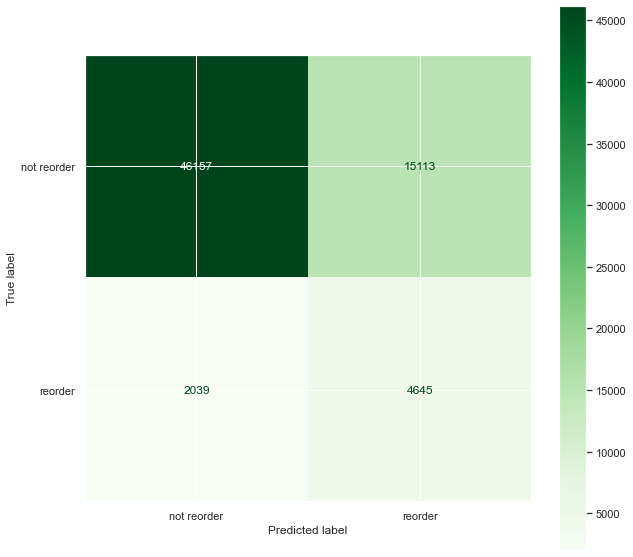

In [216]:
# plot confusion matrix 
conf_l = plot_confusion_matrix(pipeline_l, test_data_x_selected_features, test_data_y,
                      display_labels=["not reorder","reorder"],
                      values_format='',
                      cmap=plt.cm.Greens)
fig_l = conf_l.ax_.get_figure() 
fig_l.set_figwidth(10)
fig_l.set_figheight(10)  

In [217]:
acc_l = accuracy_score(test_data_y, predict_y_l)
f1_l = f1_score(test_data_y, predict_y_l)
pre_l = precision_score(test_data_y, predict_y_l)
rec_l = recall_score(test_data_y, predict_y_l)
auc_l = roc_auc_score(test_data_y, predict_y_prob_l)

In [240]:
print("Model evaluation result on test data: ")
print("F1 Score : {:.4%}".format(f1_l))
print("ROC AUC : {:.4%}".format(auc_l))
print("Accuracy : {:.4%}".format(acc_l))
print("Precision : {:.4%}".format(pre_l))
print("Recall(Sensitivity): {:.4%}".format(rec_l))

Model evaluation result on test data: 
F1 Score : 35.1335%
ROC AUC : 80.1358%
Accuracy : 74.7594%
Precision : 23.5095%
Recall(Sensitivity): 69.4943%


### b. Train the GradientBoostingClassifier model with all train-val data and the best hyper-parameters.

In [222]:
# build GradientBoostingClassifier pipeline
#this block takes about 30s to run

pipeline_g = build_ml_pipeline(GradientBoostingClassifier(
    n_estimators=150,
    min_samples_split=6,
    max_depth=6,
    learning_rate=0.01,
))

pipeline_g.fit(train_validation_data_x_select_features, train_validation_data_y)

Pipeline(steps=[('fillnan', SimpleImputer(fill_value=0.0, strategy='constant')),
                ('downSample', RandomUnderSampler()),
                ('scaler', MinMaxScaler()),
                ('model',
                 GradientBoostingClassifier(learning_rate=0.01, max_depth=6,
                                            min_samples_split=6,
                                            n_estimators=150))])

In [223]:
#recal the top 15 important features we did on train-val data
top15_features

,feature,importance
4,user_product__total_orders,0.295538
16,user__order_count,0.293911
6,user_product__reordered_mean,0.210513
0,order_number,0.082272
12,product__reordered_mean,0.069420
19,user__reordered_mean,0.014992
9,product__total_orders,0.007233
3,days_since_prior_order,0.006646
18,user__days_since_prior_order_mean,0.003915
10,product__add_to_cart_order_mean,0.002965


In [226]:
#check feature importance again on entire training data 
importances = pipeline_g.steps[3][1].feature_importances_
feature_names=train_validation_data_x_select_features.columns.tolist()
df_importances = pd.DataFrame(
    {"feature":feature_names, "importance":importances}).sort_values("importance", ascending=False)
df_importances.head(15)

,feature,importance
1,user__order_count,0.298045
0,user_product__total_orders,0.286990
2,user_product__reordered_mean,0.238852
3,order_number,0.078804
4,product__reordered_mean,0.040015
5,user__reordered_mean,0.012854
8,user__days_since_prior_order_mean,0.011348
6,product__total_orders,0.011167
12,user__product_count,0.004168
13,product__total_users,0.004051


From above two feature importance charts, there are some differences on feature importance scores and ranking. This is because the first top_15 feature list are generated by a model with hyperparameter not tuned. And the second one is using the model with the best hyperparameter. We can see there's slight difference in importance scores but they are in general similar.

### Check top 15 features's distribution on train-val data using kernel density plot

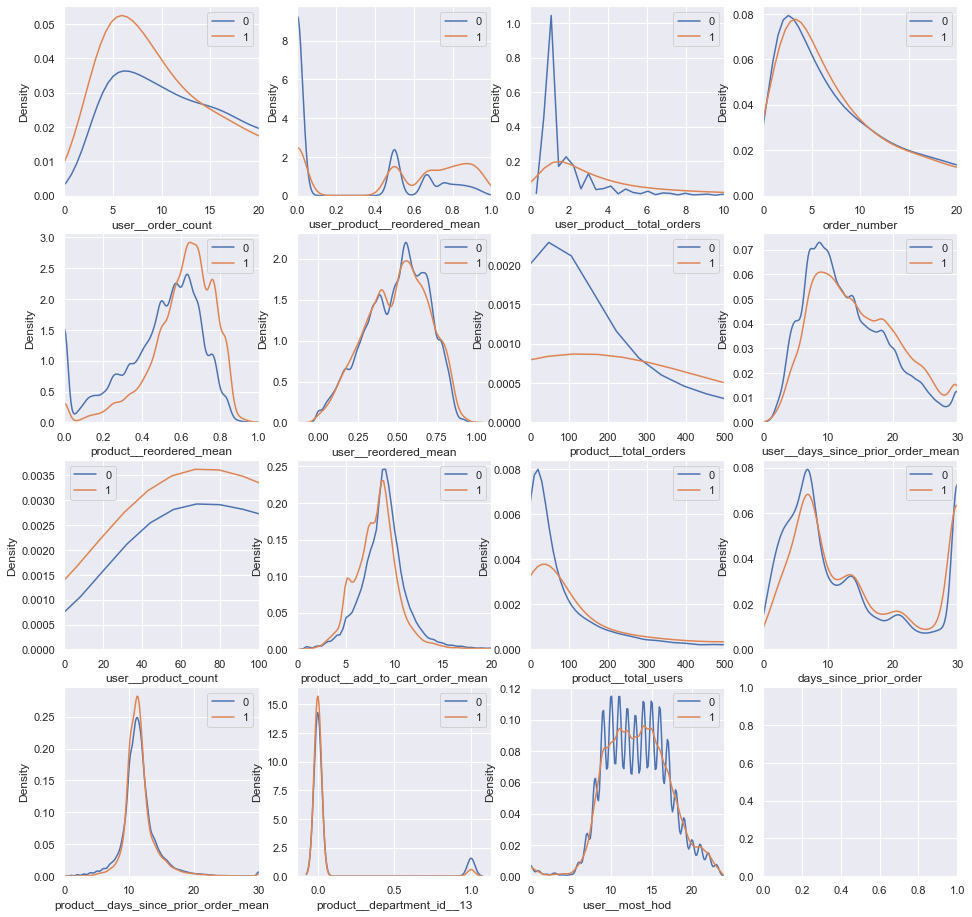

In [227]:
#each feature's kernel density plot with labels = 0 and 1

fig, axs = plt.subplots(4, 4, sharex = False, sharey = False, figsize = (16,16))
#plt.title('Feature distribution on different labels')

p1 = axs[0, 0]
p1.grid(True)
p1.set_xlim([0,20])
feature_name = 'user__order_count'
for i in sorted(train_validation_data['label'].unique()):
    sns.distplot(train_validation_data[train_validation_data['label']==i][feature_name], hist=False, label=i, ax=axs[0, 0])
p1.legend()

    
p2 = axs[0, 1]
p2.grid(True)
p2.set_xlim([0,1])

feature_name = 'user_product__reordered_mean'
for i in sorted(train_validation_data['label'].unique()):
    sns.distplot(train_validation_data[train_validation_data['label']==i][feature_name], hist=False, label=i, ax=axs[0, 1])
p2.legend()


p9 = axs[0,2]
#p9.title.set_text('Feature distribution on different labels')
p9.grid(True)
p9.set_xlim([0,10])
feature_name = 'user_product__total_orders'
for i in sorted(train_validation_data['label'].unique()):
    sns.distplot(train_validation_data[train_validation_data['label']==i][feature_name], hist=False, label=i, ax=axs[0, 2])
p9.legend()


p11 = axs[0,3]
#p11.title.set_text('Feature distribution on different labels')
p11.grid(True)
p11.set_xlim([0,20])
feature_name = 'order_number'
for i in sorted(train_validation_data['label'].unique()):
    sns.distplot(train_validation_data[train_validation_data['label']==i][feature_name], hist=False, label=i, ax=axs[0, 3])
p11.legend()


p3 = axs[1, 0]
#p3.title.set_text('Feature distribution on different labels')
p3.grid(True)
p3.set_xlim([0,1])
feature_name = 'product__reordered_mean'
for i in sorted(train_validation_data['label'].unique()):
    sns.distplot(train_validation_data[train_validation_data['label']==i][feature_name], hist=False, label=i, ax=axs[1, 0])   
p3.legend()



p4 = axs[1, 1]
#p4.title.set_text('Feature distribution on different labels')
p4.grid(True)
p2.set_xlim([0,1])
feature_name = 'user__reordered_mean'
for i in sorted(train_validation_data['label'].unique()):
    sns.distplot(train_validation_data[train_validation_data['label']==i][feature_name], hist=False, label=i, ax=axs[1, 1])
p4.legend()


p10 = axs[1,2]
#p10.title.set_text('Feature distribution on different labels')
p10.grid(True)
p10.set_xlim([0,500])
feature_name = 'product__total_orders'
for i in sorted(train_validation_data['label'].unique()):
    sns.distplot(train_validation_data[train_validation_data['label']==i][feature_name], hist=False, label=i, ax=axs[1, 2])
p10.legend()



p12 = axs[1,3]
#p12.title.set_text('Feature distribution on different labels')
p12.grid(True)
p12.set_xlim([0,30])
feature_name = 'user__days_since_prior_order_mean'
for i in sorted(train_validation_data['label'].unique()):
    sns.distplot(train_validation_data[train_validation_data['label']==i][feature_name], hist=False, label=i, ax=axs[1,3])
p12.legend()



p5 = axs[2,0]
#p5.title.set_text('Feature distribution on different labels')
p5.grid(True)
p5.set_xlim([0,100])
feature_name = 'user__product_count'
for i in sorted(train_validation_data['label'].unique()):
    sns.distplot(train_validation_data[train_validation_data['label']==i][feature_name], hist=False, label=i, ax=axs[2, 0])
p5.legend()



p6 = axs[2,1]
#p6.title.set_text('Feature distribution on different labels')
p6.grid(True)
p6.set_xlim([0,20])
feature_name = 'product__add_to_cart_order_mean'
for i in sorted(train_validation_data['label'].unique()):
    sns.distplot(train_validation_data[train_validation_data['label']==i][feature_name], hist=False, label=i, ax=axs[2, 1])
p6.legend()


p13 = axs[2,2]
#p13.title.set_text('Feature distribution on different labels')
p13.grid(True)
p13.set_xlim([0,500])
feature_name = 'product__total_users'
for i in sorted(train_validation_data['label'].unique()):
    sns.distplot(train_validation_data[train_validation_data['label']==i][feature_name], hist=False, label=i, ax=axs[2,2])
p13.legend()

p14 = axs[2,3]
#p14.title.set_text('Feature distribution on different labels')
p14.grid(True)
p14.set_xlim([0,30])
feature_name = 'days_since_prior_order'
for i in sorted(train_validation_data['label'].unique()):
    sns.distplot(train_validation_data[train_validation_data['label']==i][feature_name], hist=False, label=i, ax=axs[2,3])
p14.legend()


p7 = axs[3,0]
#p7.title.set_text('Feature distribution on different labels')
p7.grid(True)
p7.set_xlim([0,30])
feature_name = 'product__days_since_prior_order_mean'
for i in sorted(train_validation_data['label'].unique()):
    sns.distplot(train_validation_data[train_validation_data['label']==i][feature_name], hist=False, label=i, ax=axs[3, 0])
p7.legend()


p8 = axs[3,1]
#p8.title.set_text('Feature distribution on different labels')
p8.grid(True)
#p8.set_xlim([0,30])
feature_name = 'product__department_id__13'
for i in sorted(train_validation_data['label'].unique()):
    sns.distplot(train_validation_data[train_validation_data['label']==i][feature_name], hist=False, label=i, ax=axs[3, 1])
p8.legend()


p15 = axs[3,2]
#p15.title.set_text('Feature distribution on different labels')
p15.grid(True)
p15.set_xlim([0,24])
feature_name = 'user__most_hod'
for i in sorted(train_validation_data['label'].unique()):
    sns.distplot(train_validation_data[train_validation_data['label']==i][feature_name], hist=False, label=i, ax=axs[3,2])
p15.legend()
    

# Evaluate model on Test Data

### Predict product reorder on Test Data

In [230]:
#recall test dataset
test_data_x_selected_features = test_data.drop(['user_id', 'product_id', 'label'],axis=1)[top15_features['feature']]
test_data_y = test_data['label']

In [231]:
#predition
predict_y_g = pipeline_g.predict(test_data_x_selected_features)

In [232]:
#get the result into df
df_output_g = pd.DataFrame(
    {"user_id":test_data.user_id, "product_id":test_data.product_id, "predict":predict_y_g, "label":test_data.label}) 

#check result
df_output.head()

,user_id,product_id,predict,label
255,112604,30597,0,0
256,112604,46676,0,0
257,112604,13176,1,0
258,112604,16797,0,0
259,112604,7930,0,0


In [234]:
predict_y_prob_g = pipeline_g.predict_proba(test_data_x_selected_features)[:,1]

### Analyze classification result

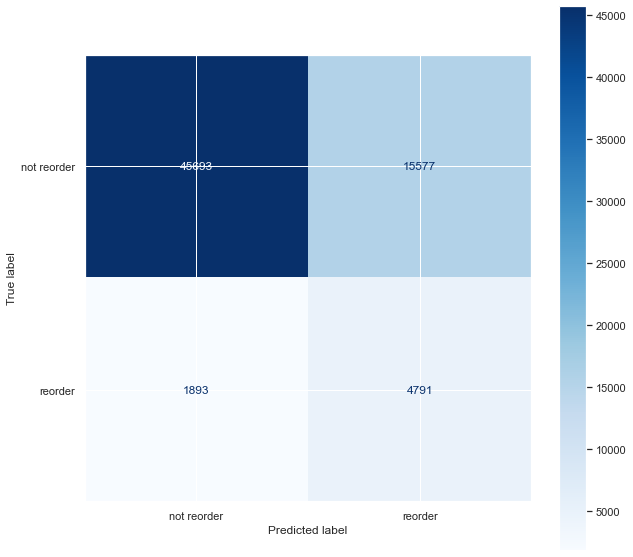

In [236]:
#plt.figure(figsize=(20, 20))

conf_g = plot_confusion_matrix(pipeline_g, test_data_x_selected_features, test_data_y,
                      display_labels=["not reorder","reorder"],
                      values_format='',
                      cmap=plt.cm.Blues)
fig = conf_g.ax_.get_figure() 
fig.set_figwidth(10)
fig.set_figheight(10)  

In [237]:
acc_g = accuracy_score(test_data_y, predict_y_g)
f1_g = f1_score(test_data_y, predict_y_g)
pre_g = precision_score(test_data_y, predict_y_g)
rec_g = recall_score(test_data_y, predict_y_g)
auc_g = roc_auc_score(test_data_y, predict_y_prob_g)

In [239]:
print("Model evaluation result on test data: ")
print("F1 Score : {:.4%}".format(f1_g))
print("ROC AUC : {:.4%}".format(auc_g))
print("Accuracy : {:.4%}".format(acc_g))
print("Precision : {:.4%}".format(pre_g))
print("Recall(Sensitivity) : {:.4%}".format(rec_g))

Model evaluation result on test data: 
F1 Score : 35.4207%
ROC AUC : 80.7609%
Accuracy : 74.2914%
Precision : 23.5222%
Recall(Sensitivity) : 71.6786%


## Observations on two final model performance
* Both models give bood insights about if the product is reordered by the user using given features. They both having pretty good performance comparing to labeled data. 
* GradientBoostingClassifier has slightly better performance, and can provide more insights on feature importance, so we think this is the preferred method if Carrot company would like to apply such model to a broader scope in solving this type of questions. 

**Interpretations on business costs:**

FP: We predict the customer is going to reorder, but the customer is actually not reordering. 
- potential issue: over-advertising
- higher business cost

FN: We predict the customer is not going to reorder, but the customer is actually reordering. 
- potential issue: forecasting/out of stock issues
- lower business cost